## Seven Days of Code - Day 3

### Data Cleaning

Day three of Seven Days of Code project
<p>More about the project <a href="https://7daysofcode.io/matricula/data-science">
here</a>.</p>

<p>Reference <a href="https://thecleverprogrammer.com/2021/09/08/apple-stock-price-prediction-with-machine-learning/">
here</a> and <a href="http://www.kasimte.com/2020/02/09/linear-regression-from-time-series-data-using-scikit-learn.html"> here</a></p>


<p>Data Source <a href="https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Ci%C3%AAncia+de+Dados+1%2F7%3A+Data+Cleaning+and+Preparation&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Java%29+Dia+1%2F7%3A+Consumir+uma+API+de+filmes" >here</a> </p>

### Goal: predict Brazilian Senators expenditure for the next three months

In [2]:
#Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import datetime

import pandas as pd

import numpy as np

In [3]:
#Import the data

#ds == date of the reimbursement
#Y == sum of the reimbursements made in a certain date

data = pd.read_csv('dataset_ceaps_forecasting.csv')

In [4]:
data.head()

,ds,y
0,2018-01-01,13062.46
1,2018-01-02,61972.66
2,2018-01-03,54424.44
3,2018-01-04,21775.57
4,2018-01-05,41703.32


In [5]:
data.tail()

,ds,y
1456,2021-12-27,28552.41
1457,2021-12-28,154547.27
1458,2021-12-29,22495.76
1459,2021-12-30,118345.56
1460,2021-12-31,27219.41


#### Average of the last three months of data

In [6]:
#Take the year and the month from ds column
data['year'] = pd.DatetimeIndex(data['ds']).year
data['month'] = pd.DatetimeIndex(data['ds']).month

In [7]:
#Filtered DataFrame
data_2021 = data.query('year == 2021')
data_2021.head()

,ds,y,year,month
1096,2021-01-01,20971.94,2021,1
1097,2021-01-02,5863.44,2021,1
1098,2021-01-03,15293.99,2021,1
1099,2021-01-04,61860.13,2021,1
1100,2021-01-05,86977.14,2021,1


In [8]:
#Filter last three months
data_threemonths = data_2021.query('month in (10,11,12)')
data_threemonths

,ds,y,year,month
1369,2021-10-01,233702.29,2021,10
1370,2021-10-02,12978.01,2021,10
1371,2021-10-03,24074.49,2021,10
1372,2021-10-04,152114.12,2021,10
1373,2021-10-05,109587.07,2021,10
...,...,...,...,...
1456,2021-12-27,28552.41,2021,12
1457,2021-12-28,154547.27,2021,12
1458,2021-12-29,22495.76,2021,12
1459,2021-12-30,118345.56,2021,12


In [9]:
#Avg "y" for the last three months
print('The avg of reimbursements for the last three months is R$', round(data['y'].mean(),2))

The avg of reimbursements for the last three months is R$ 63876.04


## Prediction

In [10]:
#Make sure "ds" is datetime
data['ds'] = pd.to_datetime(data['ds'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1461 non-null   datetime64[ns]
 1   y       1461 non-null   float64       
 2   year    1461 non-null   int64         
 3   month   1461 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 45.8 KB


In [13]:
!pip install autots

In [11]:
from autots import AutoTS

#### Check Outliers

In [13]:
data.describe()

,y,year,month
count,1461.000000,1461.000000,1461.000000
mean,63876.044497,2019.500342,6.522930
std,53285.501861,1.118111,3.449884
min,100.000000,2018.000000,1.000000
25%,19735.990000,2019.000000,4.000000
50%,53764.030000,2020.000000,7.000000
75%,91485.640000,2020.000000,10.000000
max,444152.910000,2021.000000,12.000000


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


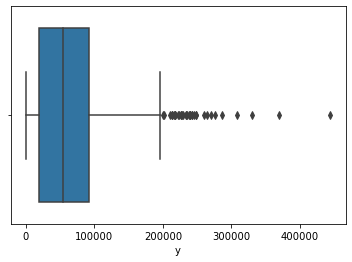

In [16]:
#First, it will be used a boxplot to visually detect the outliers

import seaborn as sns

# Boxplot
sns.boxplot(data['y']);

Values above 200000 are outliers

In [17]:
#Position of the outlier
print(np.where(data['y']>200000))

(array([  31,   58,   59,   91,  121,  212,  273,  304,  308,  336,  338,
        350,  518,  546,  638,  700,  702,  714,  791,  882,  945,  974,
       1004, 1037, 1065, 1066, 1085, 1155, 1218, 1247, 1277, 1309, 1311,
       1339, 1369, 1400, 1430], dtype=int64),)


Now, the outliers will be detected with more precision using Inter Quartile Range (IQR)

In [18]:
#IQR
Q1 = np.percentile(data['y'],25,interpolation = 'midpoint')
Q3 = np.percentile(data['y'],72,interpolation = 'midpoint')

IQR = Q3 - Q1

In [19]:
IQR

67092.05999999998

In [23]:
#Above upper bound
upper = np.where(data['y'] >= (Q3+ 1.5*IQR))

#Below lower bound
lower = np.where(data['y'] <= (Q3 - 1.5*IQR))

As AutoTS removes outliers automatically, they don't need to be removed

## Model

The library used to create this model is AutoTS, which was develop for automatic Time Series Forecasting

As explained by Aman Kharwal <a href = 'https://thecleverprogrammer.com/2021/04/19/autots-in-python-tutorial/' target= "_blank" >here</a>:

>AutoTS means Automatic Time Series, it is a machine learning library in Python used for the task of time series forecasting
>

In [37]:
#Model to forecast the next three months of expenditure
model = AutoTS(forecast_length=3, frequency = 'M', ensemble = 'simple')

In [38]:
model = model.fit(data,date_col='ds',value_col='y',id_col=None)

Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 7 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 10


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 10: GLM
Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLS in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model LastValueNaive in generation 0 of 10
Model Number: 15 with model LastValueNaive in generation 0 of 10
Model Number: 16 with model LastValueNaive in generation 0 of 10
Model Number: 17 with model LastValueNaive in generation 0 of 10
Model Number: 18 with model SeasonalNaive in generation 0 of 10
Model Number: 19 with model SeasonalNaive in generation 0 of 10
Model Number: 20 with model SeasonalNaive in generation 0 of 10
Model Number: 21 with model UnobservedComponents in generation 0 of 10


Model Number: 94 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 94: SectionalMotif
Model Number: 95 with model UnivariateMotif in generation 0 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 95: UnivariateMotif
Model Number: 96 with model UnobservedComponents in generation 0 of 10
Model Number: 97 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 97: DatepartRegression
Model Number: 98 with model Theta in generation 0 of 10


C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\_methods.py:47: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 99 with model ConstantNaive in generation 0 of 10
Model Number: 100 with model NVAR in generation 0 of 10
Model Number: 101 with model ConstantNaive in generation 0 of 10
Model Number: 102 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 102: FBProphet
Model Number: 103 with model ConstantNaive in generation 0 of 10
Model Number: 104 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 104: DatepartRegression
Model Number: 105 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 105: FBProphet
Model Number: 106 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 106: FBProphet
Model Number: 107 with model MultivariateRegression in generation 0 of 10
Mod

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 119 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 119: MultivariateRegression
Model Number: 120 with model UnivariateMotif in generation 0 of 10
Model Number: 121 with model SeasonalNaive in generation 0 of 10
Model Number: 122 with model GLS in generation 0 of 10
Model Number: 123 with model SectionalMotif in generation 0 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 123: SectionalMotif
Model Number: 124 with model MultivariateMotif in generation 0 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 124: MultivariateMotif
Model Number: 125 with model UnivariateMotif in generation 0 of 10
Model Number: 126 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Number: 176 with model UnobservedComponents in generation 1 of 10
Model Number: 177 with model UnobservedComponents in generation 1 of 10
Template Eval Error: LinAlgError('Singular matrix') in model 177: UnobservedComponents
Model Number: 178 with model GLS in generation 1 of 10
Model Number: 179 with model GLS in generation 1 of 10
Model Number: 180 with model GLS in generation 1 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'median', 'transformations': {'0': 'HPFilter', '1': 'RollingMeanTransformer', '2': 'RollingMeanTransformer', '3': 'PowerTransformer', '4': 'MaxAbsScaler'}, 'transformation_params': {'0': {'part': 'trend', 'lamb': 1600}, '1': {'fixed': False, 'window': 7}, '2': {'fixed': False, 'window': 3}, '3': {}, '4': {}}}. fail_on_forecast_nan=True") in model 180: GLS
Model Number: 181 with model LastValueNaive in generation 1 of 10
Model Number: 182 with model LastValueNaive in generation 1 of 10
Template Eval Er

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\Admin\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\Admin\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3196: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\

Model Number: 183 with model LastValueNaive in generation 1 of 10
Model Number: 184 with model UnivariateMotif in generation 1 of 10
Model Number: 185 with model UnivariateMotif in generation 1 of 10
Model Number: 186 with model UnivariateMotif in generation 1 of 10
Model Number: 187 with model UnivariateMotif in generation 1 of 10
Model Number: 188 with model SeasonalNaive in generation 1 of 10
Model Number: 189 with model SeasonalNaive in generation 1 of 10
Model Number: 190 with model SeasonalNaive in generation 1 of 10
Model Number: 191 with model SeasonalNaive in generation 1 of 10
Model Number: 192 with model MultivariateRegression in generation 1 of 10
Model Number: 193 with model MultivariateRegression in generation 1 of 10
Model Number: 194 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 194: MultivariateRegression
Model Number: 195 with model MultivariateRegress

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 247 with model DatepartRegression in generation 2 of 10


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

Model Number: 248 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on y with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 249 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on y with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 250 with model ETS in generation 2 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on y with ValueError('Can only dampen the trend component')
Model Number: 251 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on y with ValueError('endog must be strictly positive when us

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 273 with model MultivariateRegression in generation 2 of 10
Model Number: 274 with model MultivariateRegression in generation 2 of 10
Model Number: 275 with model MultivariateRegression in generation 2 of 10
Model Number: 276 with model NVAR in generation 2 of 10
Model Number: 277 with model NVAR in generation 2 of 10
Model Number: 278 with model NVAR in generation 2 of 10
Model Number: 279 with model NVAR in generation 2 of 10
Model Number: 280 with model ConstantNaive in generation 2 of 10
Model Number: 281 with model ConstantNaive in generation 2 of 10
Model Number: 282 with model ConstantNaive in generation 2 of 10
Model Number: 283 with model VAR in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 283: VAR
Model Number: 284 with model VAR in generation 2 of 10
Template Eval Error: IndexError('tuple index out of range') in model 284: VAR
Model Number: 285 with model VAR in generation 2 of 10
Template Eval Error: ValueError('

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Number: 311 with model DatepartRegression in generation 3 of 10
Model Number: 312 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 312: DatepartRegression
Model Number: 313 with model LastValueNaive in generation 3 of 10
Model Number: 314 with model LastValueNaive in generation 3 of 10
Model Number: 315 with model AverageValueNaive in generation 3 of 10
Model Number: 316 with model AverageValueNaive in generation 3 of 10
Model Number: 317 with model AverageValueNaive in generation 3 of 10
Model Number: 318 with model UnivariateMotif in generation 3 of 10
Model Number: 319 with model UnivariateMotif in generation 3 of 10
Model Number: 320 with model UnivariateMotif in generation 3 of 10
Model Number: 321 with model UnivariateMotif in generation 3 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 321: UnivariateMotif
Model Number:

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 335 with model SectionalMotif in generation 3 of 10
Template Eval Error: ValueError('XA and XB must have the same number of columns (i.e. feature dimension.)') in model 335: SectionalMotif
Model Number: 336 with model SectionalMotif in generation 3 of 10
Model Number: 337 with model UnobservedComponents in generation 3 of 10
Model Number: 338 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 338: UnobservedComponents
Model Number: 339 with model UnobservedComponents in generation 3 of 10
Model Number: 340 with model GLM in generation 3 of 10
Model Number: 341 with model GLM in generation 3 of 10
Model Number: 342 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 342: GLM
Model Number: 3

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:293: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 347 with model NVAR in generation 3 of 10
Model Number: 348 with model MultivariateRegression in generation 3 of 10
Model Number: 349 with model MultivariateRegression in generation 3 of 10


C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 349: MultivariateRegression
Model Number: 350 with model MultivariateRegression in generation 3 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 350: MultivariateRegression
Model Number: 351 with model MultivariateRegression in generation 3 of 10
Model Number: 352 with model ConstantNaive in generation 3 of 10
Model Number: 353 with model ConstantNaive in generation 3 of 10


C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


Model Number: 354 with model ConstantNaive in generation 3 of 10
Model Number: 355 with model VAR in generation 3 of 10
Template Eval Error: IndexError('tuple index out of range') in model 355: VAR
Model Number: 356 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 356: VAR
Model Number: 357 with model VAR in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 357: VAR
Model Number: 358 with model VAR in generation 3 of 10
Template Eval Error: IndexError('tuple index out of range') in model 358: VAR
Model Number: 359 with model VECM in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 359: VECM
Model Number: 360 with model VECM in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 360: VECM
Model Number: 361 with model VECM in generation 3 of 10
Template Eval Error: ValueError('Only gave one variable

Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 436: FBProphet
Model Number: 437 with model FBProphet in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 437: FBProphet
Model Number: 438 with model FBProphet in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 438: FBProphet
Model Number: 439 with model ARDL in generation 4 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 439: ARDL
Model Number: 440 with model ARDL in generation 4 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\statsmodels\\tsa\\api.py)") in model 440: ARDL
Model Number: 441 with model ARDL in generation 4 of 10
Template Eval Error: ImportError("cannot import name '

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 474 with model MultivariateRegression in generation 5 of 10
Model Number: 475 with model MultivariateRegression in generation 5 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 475: MultivariateRegression
Model Number: 476 with model MultivariateRegression in generation 5 of 10
Model Number: 477 with model MultivariateRegression in generation 5 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 477: MultivariateRegression
Model Number: 478 with model ETS in generation 5 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on y with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 479 with model ETS in generation 5 of 10


C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)


ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on y with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 480 with model ETS in generation 5 of 10
ETS failed on y with ValueError('could not broadcast input array from shape (45,) into shape (364,)')
Model Number: 481 with model ETS in generation 5 of 10
ETS failed on y with ValueError('could not broadcast input array from shape (45,) into shape (364,)')
Model Number: 482 with model SectionalMotif in generation 5 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 482: SectionalMotif
Model Number: 483 with model SectionalMotif in generation 5 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 483: SectionalMotif
Model Number: 484 with model SectionalMotif in generation 5 of 10


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Number: 485 with model SectionalMotif in generation 5 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 485: SectionalMotif
Model Number: 486 with model UnobservedComponents in generation 5 of 10
Model Number: 487 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 487: UnobservedComponents
Model Number: 488 with model UnobservedComponents in generation 5 of 10
Model Number: 489 with model NVAR in generation 5 of 10
Model Number: 490 with model NVAR in generation 5 of 10
Model Number: 491 with model NVAR in generation 5 of 10
Model Number: 492 with model GLM in generation 5 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 492: GLM
Model Number: 493 with model GLM in gen

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam


Model Number: 547 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 547: DatepartRegression
Model Number: 548 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 548: MultivariateRegression


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
 

Model Number: 549 with model MultivariateRegression in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 549: MultivariateRegression
Model Number: 550 with model MultivariateRegression in generation 6 of 10
Template Eval Error: Exception('Transformer MinMaxScaler failed on fit') in model 550: MultivariateRegression
Model Number: 551 with model MultivariateRegression in generation 6 of 10
Model Number: 552 with model ETS in generation 6 of 10
Model Number: 553 with model ETS in generation 6 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on y with ValueError('Can only dampen the trend component')
Model Number: 554 with model ETS in generation 6 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on y with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 555 with model ETS i

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 598 with model SeasonalNaive in generation 7 of 10
Model Number: 599 with model SeasonalNaive in generation 7 of 10
Model Number: 600 with model SeasonalNaive in generation 7 of 10
Model Number: 601 with model Theta in generation 7 of 10
Model Number: 602 with model Theta in generation 7 of 10
Model Number: 603 with model Theta in generation 7 of 10
Model Number: 604 with model DatepartRegression in generation 7 of 10
Model Number: 605 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 605: DatepartRegression
Model Number: 606 with model DatepartRegression in generation 7 of 10
Model Number: 607 with model UnivariateMotif in generation 7 of 10
Model Number: 608 with model UnivariateMotif in generation 7 of 10
Model Number: 609 with model UnivariateMotif in generation 7 of 10
Model Number: 610 with model UnivariateMotif in generation 7 of 10
Model Number: 611 with model Avera

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Number: 631 with model NVAR in generation 7 of 10
Model Number: 632 with model NVAR in generation 7 of 10
Model Number: 633 with model NVAR in generation 7 of 10
Model Number: 634 with model NVAR in generation 7 of 10
Model Number: 635 with model GLM in generation 7 of 10
Model Number: 636 with model GLM in generation 7 of 10
Model Number: 637 with model GLM in generation 7 of 10
Model Number: 638 with model GLM in generation 7 of 10
Model Number: 639 with model ConstantNaive in generation 7 of 10
Model Number: 640 with model ConstantNaive in generation 7 of 10
Model Number: 641 with model ConstantNaive in generation 7 of 10
Model Number: 642 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 642: VAR
Model Number: 643 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 643: VAR
Model Number: 644 with model VAR in generation 7 of 10
Template Eval Error: ValueErro

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: Degrees of freedom <= 0 for slice
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
C:\Users\Admin\anac

Template Eval Error: Exception('Transformer PowerTransformer failed on fit') in model 649: VECM
Model Number: 650 with model FBProphet in generation 7 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 650: FBProphet
Model Number: 651 with model FBProphet in generation 7 of 10
Template Eval Error: Exception('Transformer MaxAbsScaler failed on fit') in model 651: FBProphet
Model Number: 652 with model FBProphet in generation 7 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 652: FBProphet
Model Number: 653 with model FBProphet in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 653: FBProphet
Model Number: 654 with model ARDL in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 654: ARDL
Model Number: 655 with model ARDL in generation 7 of 10
Template Eval Error: ValueError("r

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
C:\Users\Admin\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['Timestamp', 'str']. An error will be raised in 1.2.
  warnings.warn(


Model Number: 673 with model Theta in generation 8 of 10
Model Number: 674 with model Theta in generation 8 of 10
Model Number: 675 with model Theta in generation 8 of 10
Model Number: 676 with model Theta in generation 8 of 10
Model Number: 677 with model LastValueNaive in generation 8 of 10
Model Number: 678 with model LastValueNaive in generation 8 of 10
Model Number: 679 with model LastValueNaive in generation 8 of 10
Model Number: 680 with model DatepartRegression in generation 8 of 10
Model Number: 681 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 681: DatepartRegression
Model Number: 682 with model DatepartRegression in generation 8 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 682: DatepartRegression
Model Number: 683 with model AverageValueNaive in generation 8 of 10
Model Number: 684 with model AverageValue

Model Number: 745 with model Theta in generation 9 of 10
Model Number: 746 with model Theta in generation 9 of 10
Model Number: 747 with model Theta in generation 9 of 10
Model Number: 748 with model Theta in generation 9 of 10
Model Number: 749 with model LastValueNaive in generation 9 of 10
Model Number: 750 with model LastValueNaive in generation 9 of 10
Model Number: 751 with model LastValueNaive in generation 9 of 10
Model Number: 752 with model DatepartRegression in generation 9 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 752: DatepartRegression
Model Number: 753 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 753: DatepartRegression
Model Number: 754 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regres

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Model Number: 759 with model UnobservedComponents in generation 9 of 10
Model Number: 760 with model UnobservedComponents in generation 9 of 10
Model Number: 761 with model UnivariateMotif in generation 9 of 10
Template Eval Error: ValueError('kth(=15) out of bounds (15)') in model 761: UnivariateMotif
Model Number: 762 with model UnivariateMotif in generation 9 of 10
Model Number: 763 with model UnivariateMotif in generation 9 of 10
Model Number: 764 with model UnivariateMotif in generation 9 of 10
Model Number: 765 with model ETS in generation 9 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on y with ValueError('Can only dampen the trend component')
Model Number: 766 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on y with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 767 wit

C:\Users\Admin\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\Admin\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
C:\Users\Admin\anaconda3\lib\site-packages\autots\tools\probabilistic.py:67: RuntimeWarning: invalid value encountered in true_divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
C:\Users\Admin\anaconda3\lib\site-packages\autots\tools\probabilistic.py:68: RuntimeWarning: divide by zero encountered in true_divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 772 with model MultivariateRegression in generation 9 of 10
Model Number: 773 with model MultivariateRegression in generation 9 of 10
Model Number: 774 with model MultivariateRegression in generation 9 of 10
Model Number: 775 with model MultivariateRegression in generation 9 of 10
Model Number: 776 with model GLM in generation 9 of 10
Model Number: 777 with model GLM in generation 9 of 10
Model Number: 778 with model GLM in generation 9 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 778: GLM
Model Number: 779 with model GLM in generation 9 of 10
Model Number: 780 with model NVAR in generation 9 of 10
Model Number: 781 with model NVAR in generation 9 of 10
Model Number: 782 with model NVAR in generation 9 of 10
Model Number: 783 with model NVAR in generation 9 of 10
Model Number: 784 with model ConstantNaive in gener

Model Number: 847 with model MultivariateRegression in generation 10 of 10
Model Number: 848 with model MultivariateRegression in generation 10 of 10
Template Eval Error: XGBoostError('[17:10:42] C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:332: PoissonRegression: label must be nonnegative') in model 848: MultivariateRegression
Model Number: 849 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 849: MultivariateRegression
Model Number: 850 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 850: MultivariateRegression
Model Number: 851 with model NVAR in generation 10 of 10
Model Number: 852 with model NVAR in generation 10 of 10
Model Number: 853 with model NVAR in generation 10 of 10
Model Number: 854 with model NVAR in gene

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

35 - WindowRegression with avg smape 65.09: 
Model Number: 36 of 130 with model GLM for Validation 1
36 - GLM with avg smape 51.97: 
Model Number: 37 of 130 with model SectionalMotif for Validation 1
37 - SectionalMotif with avg smape 63.21: 
Model Number: 38 of 130 with model MultivariateMotif for Validation 1
38 - MultivariateMotif with avg smape 68.52: 
Model Number: 39 of 130 with model AverageValueNaive for Validation 1
39 - AverageValueNaive with avg smape 80.61: 
Model Number: 40 of 130 with model MultivariateMotif for Validation 1
40 - MultivariateMotif with avg smape 74.17: 
Model Number: 41 of 130 with model UnobservedComponents for Validation 1
41 - UnobservedComponents with avg smape 54.84: 
Model Number: 42 of 130 with model WindowRegression for Validation 1
42 - WindowRegression with avg smape 38.17: 
Model Number: 43 of 130 with model UnivariateMotif for Validation 1
43 - UnivariateMotif with avg smape 42.45: 
Model Number: 44 of 130 with model UnivariateMotif for Valida

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


67 - DatepartRegression with avg smape 60.73: 
Model Number: 68 of 130 with model GLS for Validation 1
68 - GLS with avg smape 45.88: 
Model Number: 69 of 130 with model GLS for Validation 1
69 - GLS with avg smape 45.88: 
Model Number: 70 of 130 with model GLS for Validation 1
70 - GLS with avg smape 45.88: 
Model Number: 71 of 130 with model WindowRegression for Validation 1
71 - WindowRegression with avg smape 61.26: 
Model Number: 72 of 130 with model GLS for Validation 1
72 - GLS with avg smape 60.69: 
Model Number: 73 of 130 with model AverageValueNaive for Validation 1
73 - AverageValueNaive with avg smape 39.71: 
Model Number: 74 of 130 with model GLS for Validation 1
74 - GLS with avg smape 60.73: 
Model Number: 75 of 130 with model GLS for Validation 1
75 - GLS with avg smape 60.73: 
Model Number: 76 of 130 with model SectionalMotif for Validation 1
76 - SectionalMotif with avg smape 69.82: 
Model Number: 77 of 130 with model UnivariateMotif for Validation 1
77 - UnivariateMo

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


110 - DatepartRegression with avg smape 21.21: 
Model Number: 111 of 130 with model UnobservedComponents for Validation 1
111 - UnobservedComponents with avg smape 57.19: 
Model Number: 112 of 130 with model MultivariateRegression for Validation 1
112 - MultivariateRegression with avg smape 17.76: 
Model Number: 113 of 130 with model MultivariateRegression for Validation 1
113 - MultivariateRegression with avg smape 89.85: 
Model Number: 114 of 130 with model UnobservedComponents for Validation 1
114 - UnobservedComponents with avg smape 70.98: 
Model Number: 115 of 130 with model LastValueNaive for Validation 1
115 - LastValueNaive with avg smape 64.84: 
Model Number: 116 of 130 with model MultivariateRegression for Validation 1
116 - MultivariateRegression with avg smape 91.81: 
Model Number: 117 of 130 with model UnobservedComponents for Validation 1
117 - UnobservedComponents with avg smape 71.88: 
Model Number: 118 of 130 with model MultivariateRegression for Validation 1
118 - Mu

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

34 - SectionalMotif with avg smape 90.1: 
Model Number: 35 of 130 with model WindowRegression for Validation 2
35 - WindowRegression with avg smape 70.46: 
Model Number: 36 of 130 with model GLM for Validation 2
36 - GLM with avg smape 103.53: 
Model Number: 37 of 130 with model SectionalMotif for Validation 2
37 - SectionalMotif with avg smape 114.14: 
Model Number: 38 of 130 with model MultivariateMotif for Validation 2
38 - MultivariateMotif with avg smape 93.12: 
Model Number: 39 of 130 with model AverageValueNaive for Validation 2
39 - AverageValueNaive with avg smape 115.56: 
Model Number: 40 of 130 with model MultivariateMotif for Validation 2
40 - MultivariateMotif with avg smape 114.64: 
Model Number: 41 of 130 with model UnobservedComponents for Validation 2
41 - UnobservedComponents with avg smape 59.32: 
Model Number: 42 of 130 with model WindowRegression for Validation 2
42 - WindowRegression with avg smape 90.05: 
Model Number: 43 of 130 with model UnivariateMotif for Val

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


68 - GLS with avg smape 96.19: 
Model Number: 69 of 130 with model GLS for Validation 2
69 - GLS with avg smape 96.19: 
Model Number: 70 of 130 with model GLS for Validation 2
70 - GLS with avg smape 96.19: 
Model Number: 71 of 130 with model WindowRegression for Validation 2
71 - WindowRegression with avg smape 92.93: 
Model Number: 72 of 130 with model GLS for Validation 2
72 - GLS with avg smape 93.06: 
Model Number: 73 of 130 with model AverageValueNaive for Validation 2
73 - AverageValueNaive with avg smape 93.91: 
Model Number: 74 of 130 with model GLS for Validation 2
74 - GLS with avg smape 93.09: 
Model Number: 75 of 130 with model GLS for Validation 2
75 - GLS with avg smape 93.09: 
Model Number: 76 of 130 with model SectionalMotif for Validation 2
76 - SectionalMotif with avg smape 83.73: 
Model Number: 77 of 130 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('kth(=10) out of bounds (9)') in model 77: UnivariateMotif
Model Number: 78 of 130 with 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


82 - UnobservedComponents with avg smape 80.41: 
Model Number: 83 of 130 with model MultivariateRegression for Validation 2
83 - MultivariateRegression with avg smape 99.57: 
Model Number: 84 of 130 with model SectionalMotif for Validation 2
84 - SectionalMotif with avg smape 85.1: 
Model Number: 85 of 130 with model SectionalMotif for Validation 2
85 - SectionalMotif with avg smape 95.26: 
Model Number: 86 of 130 with model AverageValueNaive for Validation 2
86 - AverageValueNaive with avg smape 95.4: 
Model Number: 87 of 130 with model GLM for Validation 2
87 - GLM with avg smape 91.89: 
Model Number: 88 of 130 with model UnivariateMotif for Validation 2
Template Eval Error: ValueError('kth(=10) out of bounds (9)') in model 88: UnivariateMotif
Model Number: 89 of 130 with model SectionalMotif for Validation 2
89 - SectionalMotif with avg smape 85.55: 
Model Number: 90 of 130 with model SectionalMotif for Validation 2
90 - SectionalMotif with avg smape 66.18: 
Model Number: 91 of 130 

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


111 - UnobservedComponents with avg smape 98.01: 
Model Number: 112 of 130 with model MultivariateRegression for Validation 2
📈 112 - MultivariateRegression with avg smape 37.2: 
Model Number: 113 of 130 with model MultivariateRegression for Validation 2
113 - MultivariateRegression with avg smape 184.13: 
Model Number: 114 of 130 with model UnobservedComponents for Validation 2
114 - UnobservedComponents with avg smape 72.42: 
Model Number: 115 of 130 with model LastValueNaive for Validation 2
115 - LastValueNaive with avg smape 45.1: 
Model Number: 116 of 130 with model MultivariateRegression for Validation 2
116 - MultivariateRegression with avg smape 122.18: 
Model Number: 117 of 130 with model UnobservedComponents for Validation 2
117 - UnobservedComponents with avg smape 72.55: 
Model Number: 118 of 130 with model MultivariateRegression for Validation 2
118 - MultivariateRegression with avg smape 98.69: 
Model Number: 119 of 130 with model LastValueNaive for Validation 2
119 - La

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature nam

35 - WindowRegression with avg smape 88.36: 


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

Model Number: 36 of 130 with model GLM for Validation 3
Template Eval Error: PerfectSeparationError('Perfect separation detected, results not available') in model 36: GLM
Model Number: 37 of 130 with model SectionalMotif for Validation 3
37 - SectionalMotif with avg smape 101.9: 
Model Number: 38 of 130 with model MultivariateMotif for Validation 3
38 - MultivariateMotif with avg smape 93.64: 
Model Number: 39 of 130 with model AverageValueNaive for Validation 3
39 - AverageValueNaive with avg smape 104.33: 
Model Number: 40 of 130 with model MultivariateMotif for Validation 3
40 - MultivariateMotif with avg smape 88.75: 
Model Number: 41 of 130 with model UnobservedComponents for Validation 3
41 - UnobservedComponents with avg smape 161.24: 
Model Number: 42 of 130 with model WindowRegression for Validation 3
42 - WindowRegression with avg smape 129.96: 
Model Number: 43 of 130 with model UnivariateMotif for Validation 3
Template Eval Error: ValueError('kth(=10) out of bounds (6)') in

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


69 - GLS with avg smape 82.61: 
Model Number: 70 of 130 with model GLS for Validation 3
70 - GLS with avg smape 82.61: 
Model Number: 71 of 130 with model WindowRegression for Validation 3
71 - WindowRegression with avg smape 82.56: 
Model Number: 72 of 130 with model GLS for Validation 3
72 - GLS with avg smape 82.61: 
Model Number: 73 of 130 with model AverageValueNaive for Validation 3
73 - AverageValueNaive with avg smape 73.7: 
Model Number: 74 of 130 with model GLS for Validation 3
74 - GLS with avg smape 82.61: 
Model Number: 75 of 130 with model GLS for Validation 3
75 - GLS with avg smape 82.61: 
Model Number: 76 of 130 with model SectionalMotif for Validation 3
76 - SectionalMotif with avg smape 103.0: 
Model Number: 77 of 130 with model UnivariateMotif for Validation 3
Template Eval Error: ValueError('kth(=10) out of bounds (6)') in model 77: UnivariateMotif
Model Number: 78 of 130 with model UnivariateMotif for Validation 3
Template Eval Error: ValueError('kth(=10) out of b

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


82 - UnobservedComponents with avg smape 82.61: 
Model Number: 83 of 130 with model MultivariateRegression for Validation 3
83 - MultivariateRegression with avg smape 96.0: 
Model Number: 84 of 130 with model SectionalMotif for Validation 3
84 - SectionalMotif with avg smape 102.8: 
Model Number: 85 of 130 with model SectionalMotif for Validation 3
85 - SectionalMotif with avg smape 89.52: 
Model Number: 86 of 130 with model AverageValueNaive for Validation 3
86 - AverageValueNaive with avg smape 81.43: 
Model Number: 87 of 130 with model GLM for Validation 3
87 - GLM with avg smape 74.87: 
Model Number: 88 of 130 with model UnivariateMotif for Validation 3
Template Eval Error: ValueError('kth(=10) out of bounds (6)') in model 88: UnivariateMotif
Model Number: 89 of 130 with model SectionalMotif for Validation 3
89 - SectionalMotif with avg smape 97.11: 
Model Number: 90 of 130 with model SectionalMotif for Validation 3
90 - SectionalMotif with avg smape 90.92: 
Model Number: 91 of 130

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


110 - DatepartRegression with avg smape 77.8: 
Model Number: 111 of 130 with model UnobservedComponents for Validation 3
111 - UnobservedComponents with avg smape 81.98: 
Model Number: 112 of 130 with model MultivariateRegression for Validation 3
112 - MultivariateRegression with avg smape 101.69: 
Model Number: 113 of 130 with model MultivariateRegression for Validation 3
113 - MultivariateRegression with avg smape 128.21: 
Model Number: 114 of 130 with model UnobservedComponents for Validation 3
114 - UnobservedComponents with avg smape 64.48: 
Model Number: 115 of 130 with model LastValueNaive for Validation 3
115 - LastValueNaive with avg smape 124.62: 
Model Number: 116 of 130 with model MultivariateRegression for Validation 3
116 - MultivariateRegression with avg smape 72.63: 
Model Number: 117 of 130 with model UnobservedComponents for Validation 3
117 - UnobservedComponents with avg smape 64.45: 
Model Number: 118 of 130 with model MultivariateRegression for Validation 3
118 - 

In [33]:
prediction = model.predict()

In [34]:
forecast = prediction.forecast

In [36]:
#Forecast
print(forecast.round(2))

                   y
2022-01-31  15693.43
2022-02-28  79991.34
2022-03-31  55111.62
